In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../datasets/housing_data.csv')
df.shape

(30471, 292)

In [3]:
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [4]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

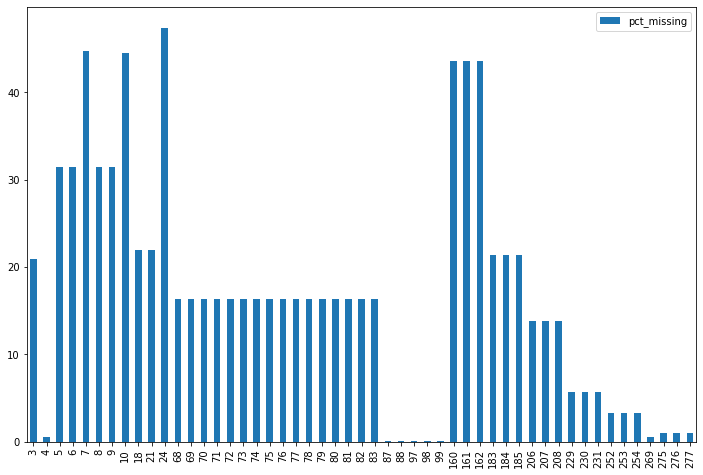

In [5]:
# creating a visual out of this information for better understanding
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

In [8]:
# droping cols that have less than 5% nulls
less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.5) & (pct_missing_df.pct_missing > 0), 'col'].values)
df.dropna(subset=less_missing_values_cols_list, inplace=True)
less_missing_values_cols_list

['metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk']

In [9]:
# dropping columns with more than 40% null values
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 40, 'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)
_40_pct_missing_cols_list

['build_year',
 'state',
 'hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500']

In [10]:
df.shape

(30446, 286)

In [12]:
# We will now impute the missing values in each numerical column with the median value of that column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = df[col].median() #impute with the median
        df[col] = df[col].fillna(med)

In [15]:
df_numeric.head()

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,area_m,raion_popul,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,43,27.0,4.0,12.0,1.0,NaN,NaN,6.407578e+06,155572,...,9,4,0,13,22,1,0,52,4,5850000
1,2,34,19.0,3.0,12.0,1.0,NaN,NaN,9.589337e+06,115352,...,15,3,0,15,29,1,10,66,14,6000000
2,3,43,29.0,2.0,12.0,1.0,NaN,NaN,4.808270e+06,101708,...,10,3,0,11,27,0,4,67,10,5700000
3,4,89,50.0,9.0,12.0,1.0,NaN,NaN,1.258354e+07,178473,...,11,2,1,4,4,0,0,26,3,13100000
4,5,77,77.0,4.0,12.0,1.0,NaN,NaN,8.398461e+06,108171,...,319,108,17,135,236,2,91,195,14,16331452


In [16]:
# In the case of categorical columns, we will replace missing values with the mode values of that column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = df[col].describe()['top'] # impute with the most frequently occuring value
        df[col] = df[col].fillna(mod)

In [17]:
df_non_numeric.head()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


In [19]:
df.isnull().sum()

id                    0
timestamp             0
full_sq               0
life_sq               0
floor                 0
                     ..
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
price_doc             0
Length: 286, dtype: int64

In [20]:
# An outlier is an unusual observation that lies away from the majority of the data
df.life_sq.describe()

count    30446.000000
mean        33.482658
std         46.538609
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

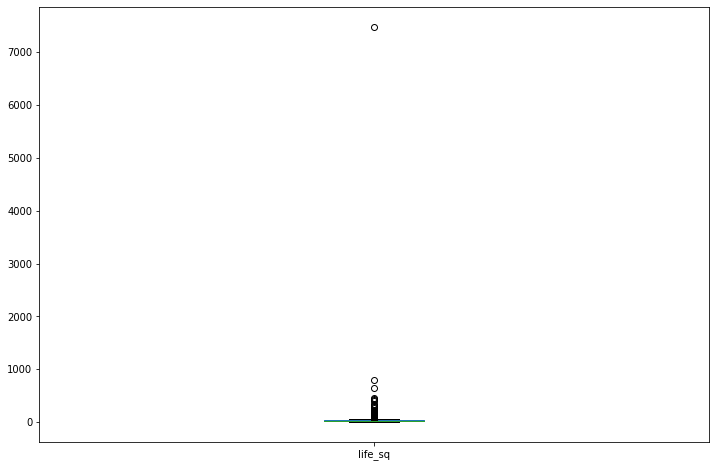

In [21]:
#  it is clear that something is not correct. The max value seems to be abnormally large
#  we'll make a boxplot of this data to get a better idea.
df.life_sq.plot(kind='box', figsize=(12, 8))
plt.show()

In [22]:
# removing the outlier value in life_sq column
df = df.loc[df.life_sq < 7478]


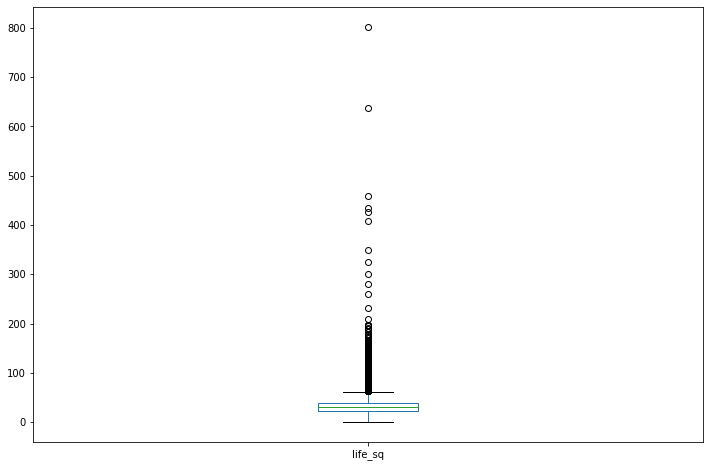

In [23]:
# getting newly boxplot we can see the correction applied
df.life_sq.plot(kind='box', figsize=(12, 8))
plt.show()

In [26]:
# dropping records duplicates by considering all columns except ID
df = df.copy()
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)

In [31]:
list(df.columns)[1:10]

['timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq',
 'product_type']

In [32]:
# checking the data type of the timestamp column in our data
df.timestamp.dtype

dtype('O')

In [33]:
# converting timestamp to datetime format
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')

In [36]:
df.timestamp.dtype

dtype('<M8[ns]')